In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

df = pd.read_csv('bigmart_train.csv')
df_otest = pd.read_csv('bigmart_test.csv')

In [40]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [19]:
# def clean_header(df):
#     """
#     This functions removes weird characters and spaces from column names, while keeping everything lower case
#     """
#     df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


# clean_header(df)
# df.head()

item_identifier  item_weight item_fat_content  item_visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               item_type  item_mrp outlet_identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   outlet_establishment_year outlet_size outlet_location_type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         outlet_type  item_outlet_sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

### Function for Univariate analysis:
Moving onto EDA, we can define any function once, and call it by passing the feature name from the dataset as parameters.
I have attached a GitHub link that demonstrates the implementation of all functions described below – Github – https://github.com/r-pant/data-hacks/blob/master/big%20mart%20sales/file1.ipynb



### Categorical:
Below function plots count plot for the feature being passed to the function.

In [53]:
# # Let's define the function for plotting  categorical values:

def plot_cat(var,l=8,b=5):
    plt.figure(figsize =(l,b))
    sns.countplot(df[var], order = df[var].value_counts().index)
    


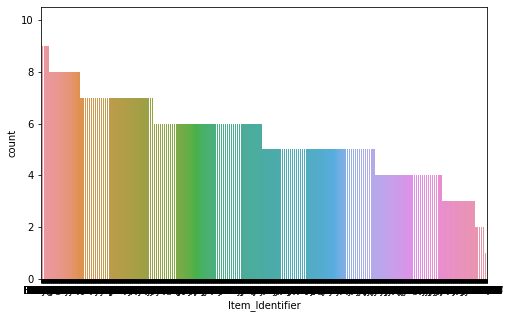

In [54]:
plot_cat('Item_Identifier', l=8, b=5)

In [69]:
def plot_cat(var,l=7,b=5):

    # size = len(var)
    plt.figure(figsize = (l,b), dpi = 100)

    norm_count = df[var].value_counts(normalize = True)
    n_uni = df[var].nunique()
    #Plotting the variable with every information
    # plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 10)
    plt.ylabel('{}'.format(var), fontsize = 10)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    


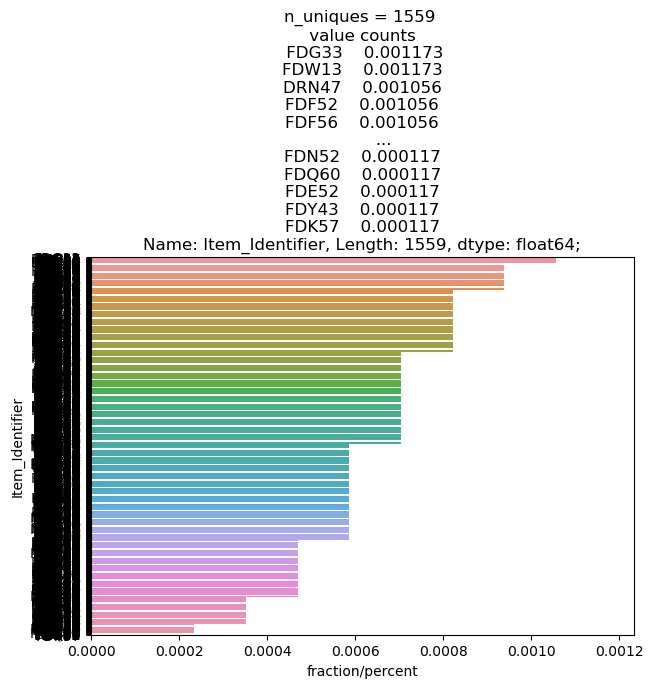

In [70]:
plot_cat('Item_Identifier')

### Continuous:
###### 1. For a simple distplot for continuous feature

In [57]:
def plot_cont(var, l=8,b=5):
    plt.figure(figsize=(l, b))
    sns.distplot(df[var])
    plt.xlabel(var)

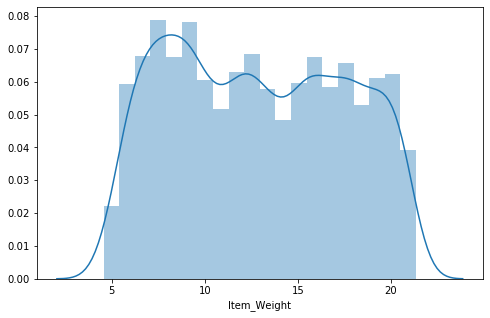

In [58]:
plot_cont('Item_Weight')

###### 2. To view a detailed kde plot with all details:

In [66]:
 # plot kde plot with median and Std values
def plot_cont_kde(var, l=8,b=5):
    mini = df[var].min()
    maxi = df[var].max()
    ran = df[var].max()-df[var].min()
    mean = df[var].mean()
    skew = df[var].skew()
    kurt = df[var].kurtosis()
    median = df[var].median()
    st_dev = df[var].std()
    points = mean-st_dev, mean+st_dev
    fig, axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=var, ax=axes[0])
    sns.distplot(a=df[var], ax=axes[1], color='#ff4125')
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini, maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    fig.set_size_inches(l,b)
    plt.title('std_dev = {}; kurtosis = {};nskew = {}; range = {}nmean = {};  median =  {}'.format((round(points[0],2),round(points[1],2)),
                                round(kurt,2),round(skew,2),(round(mini,2),round(maxi,2),
                                round(ran,2)),round(mean,2), round(median,2)))

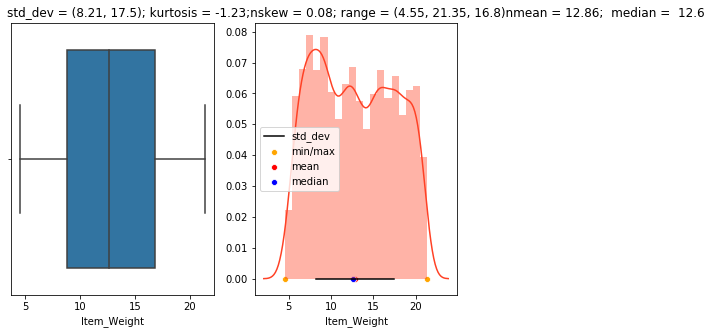

In [67]:
plot_cont_kde('Item_Weight')

### Functions for Bi-variate analysis:
The bi-variate analysis is very helpful in finding out correlation patterns and to test our hypothesis.
This will help us infer and build different features to feed into our model.

### Categorical-Categorical:

In [76]:
def BVA_categorical_plot(data, tar, cat):
    '''take data and two categorical variables,
    calculates the chi2 significance between the two variables
      and prints the result with countplot & CrossTab
     '''
    #isolating the variables
    data = data[[cat,tar]][:]
    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat],)
    f_obs = np.array([table.iloc[0][:].values,
    table.iloc[1][:].values])
    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(f_obs)
    #checking whether results are significant
    if p<0.05:
         sig = True
    else:
         sig = False
    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title("p-value = {}n difference significant? = {}n".format(round(p,8),sig))
    #plotting percent stacked bar plot
    #sns.catplot(ax, kind='stacked')
    ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True',title=str(ax1))
    int_level = data[cat].value_counts()

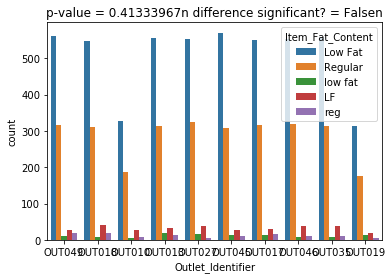

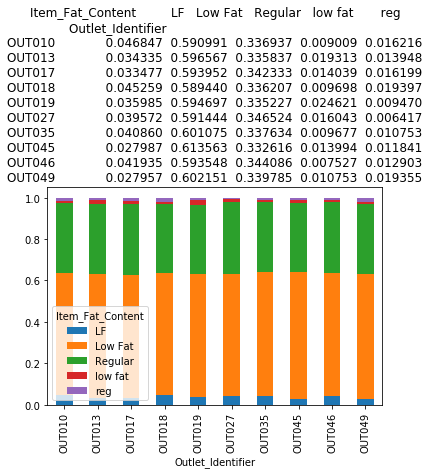

In [79]:
BVA_categorical_plot(df,'Item_Fat_Content', 'Outlet_Identifier')

### Categorical-Continuous:

Here, I have used two functions, one to calculate z-value and the others to plot the relation between our features.

In [87]:
def TwoSampleZ(X1, X2, sigma1, sigma2, N1, N2):
    
    '''
     function takes mean, standard dev., and no. of observations and returns: p-value calculated  for 2-sampled Z-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return pval
#--------------------------------------------------------------------------------------------------------------------------
def Bivariate_cont_cat(data, cont, cat, category):
    
    #creating 2 samples
    x1 = data[cont][data[cat]==category][:] # all categorical features
    x2 = data[cont][~(data[cat]==category)][:] # all continuous features
    #calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean() # calculates mean
    std1, std2 = x1.std(), x2.mean() # calculates standard deviation
    #calculating p-values
    z_p_val = TwoSampleZ(m1, m2, std1, std2, n1, n2)
    #table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
    #plotting
    plt.figure(figsize = (15,6), dpi=140)
    #barplot
    plt.subplot(1,2,1)
    sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title(' n z-test p-value = {}n {}'.format(z_p_val,table))
    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('categorical boxplot')

In [91]:
Bivariate_cont_cat(df, 'Item_weight', 'Item_Fat_Content', 'object')

KeyError: 'Item_weight'

### Continuous-Continuous:

In [103]:
 #Defining a function to calculate correlation among columns:
def corr_2_cols(Col1, Col2):
     res = pd.crosstab(df[Col1],df[Col2])
     #res1 = df.groupby([Col1, Col2]).size().unstack()
     res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
     return res

In [104]:
corr_2_cols('Item_Weight', 'Item_MRP')

Item_MRP     31.49  31.89  31.9558  32.0558  32.09  32.3558  32.4558  32.49  \
Item_Weight                                                                   
4.555            0      0        0        0      0        0        0      0   
4.590            0      0        0        0      0        0        0      0   
4.610            0      0        0        0      0        0        0      0   
4.615            0      0        0        0      0        0        0      0   
4.635            0      0        0        0      0        0        0      0   
...            ...    ...      ...      ...    ...      ...      ...    ...   
21.000           0      0        0        0      0        0        0      0   
21.100           0      0        0        0      0        0        0      0   
21.200           0      0        0        0      0        0        0      0   
21.250           0      0        0        0      0        0        0      0   
21.350           0      0        0        0      0        0        0      0   

Item_MRP     32.6558  32.8558  ...  265.5568  265.6884  265.7884  265.8884  \
Item_Weight                    ...                                           
4.555              0        0  ...         0         0         0         0   
4.590              0        0  ...         0         0         0         0   
4.610              0        0  ...         0         0         0         0   
4.615              0        0  ...         0         0         0         0   
4.635              0        0  ...         0         0         0         0   
...              ...      ...  ...       ...       ...       ...       ...   
21.000             0        0  ...         0         0         0         0   
21.100             0        0  ...         0         0         0         0   
21.200             0        0  ...         0         0         0         0   
21.250             0        0  ...         0         0         0         0   
21.350             0        0  ...         0         0         0         0   

Item_MRP     266.1884  266.2884  266.5884  266.6884  266.8884  perc  
Item_Weight                                                          
4.555               0         0         0         0         0   NaN  
4.590               0         0         0         0         0   NaN  
4.610               0         0         0         0         0   NaN  
4.615               0         0         0         0         0   NaN  
4.635               0         0         0         0         0   NaN  
...               ...       ...       ...       ...       ...   ...  
21.000              0         0         0         0         0   NaN  
21.100              0         0         0         0         0   NaN  
21.200              0         0         0         0         0   NaN  
21.250              0         0         0         0         0   NaN  
21.350              0         0         0         0         0   NaN  

[415 rows x 5226 columns]

### Functions for Multi-variate analysis:

In [105]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
            #boxplot
            sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
            plt.title('Boxplot')

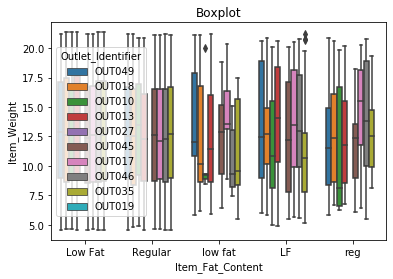

In [107]:
Grouped_Box_Plot(df, 'Item_Weight', 'Item_Fat_Content', 'Outlet_Identifier')

In [45]:
# cat_group = ['Item_Fat_Content','Item_Type',]
cont_group = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']

In [46]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True


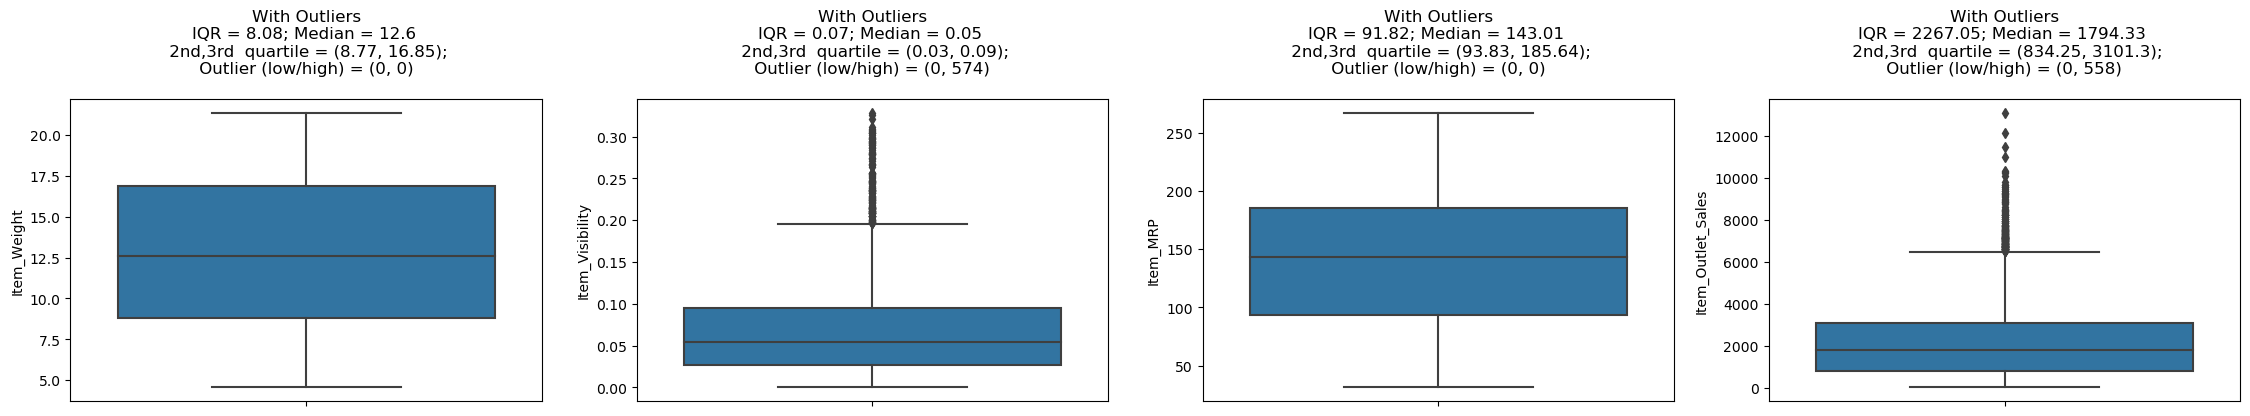

In [47]:
UVA_outlier(df,cont_group)

In [48]:
numerical = df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [49]:
correlation = numerical.dropna().corr()
correlation

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.006061   
Item_MRP                      0.027141        -0.006061  1.000000   
Outlet_Establishment_Year    -0.011588        -0.016935 -0.001657   
Item_Outlet_Sales             0.014123        -0.085334  0.620961   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.016935          -0.085334  
Item_MRP                                   -0.001657           0.620961  
Outlet_Establishment_Year                   1.000000           0.012212  
Item_Outlet_Sales                           0.012212           1.000000

In [51]:

df.groupby(by =['Outlet_Type','Outlet_Size'])[ 'Item_Type','Outlet_Location_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'].mean()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Item_MRP  Outlet_Establishment_Year  \
Outlet_Type       Outlet_Size                                          
Grocery Store     Small        139.787088                     1985.0   
Supermarket Type1 High         141.425982                     1987.0   
                  Medium       140.297699                     1999.0   
                  Small        142.589934                     2000.5   
Supermarket Type2 Medium       141.678634                     2009.0   
Supermarket Type3 Medium       139.801791                     1985.0   

                               Item_Outlet_Sales  
Outlet_Type       Outlet_Size                     
Grocery Store     Small               340.329723  
Supermarket Type1 High               2298.995256  
                  Medium             2348.354635  
                  Small              2358.343066  
Supermarket Type2 Medium             1995.498739  
Supermarket Type3 Medium             3694.038558

GridSpec(6, 6)

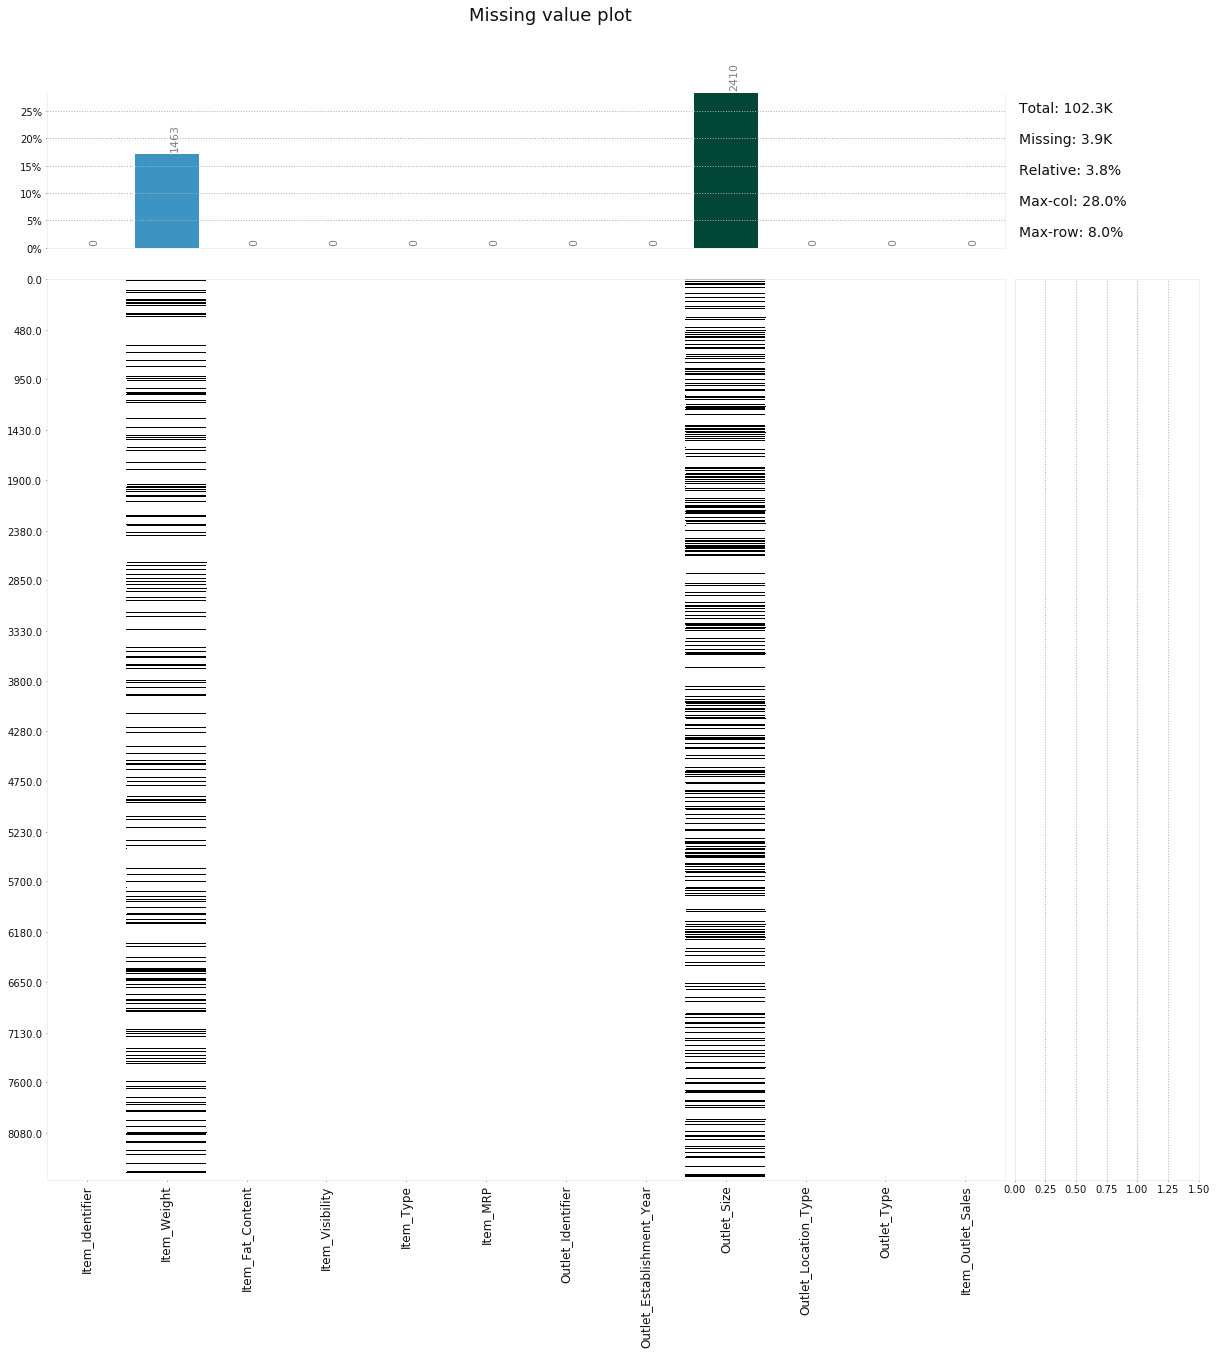

In [108]:
import klib
import pandas as pd

#missing value visualization of klib
klib.missingval_plot(df)

### Data Cleaning
With this insight, we can go ahead and start cleaning the data. With klib this is as simple as calling klib.data_cleaning(), which performs the following operations:
###### cleaning the column names:
This unifies the column names by formatting them, splitting, among others, CamelCase into camel_case, removing special characters as well as leading and trailing white-spaces and formatting all column names to lowercase_and_underscore_separated. This also checks for and fixes duplicate column names, which you sometimes get when reading data from a file.
###### dropping empty and virtually empty columns:
You can use the parameters drop_threshold_cols and drop_threshold_rows to adjust the dropping to your needs. The default is to drop columns and rows with more than 90% of the values missing.
###### removes single valued columns:
As the name states, this removes columns in which each cell contains the same value. This comes in handy when columns such as “year” are included while you’re just looking at a single year. Other examples are “download_date” or indicator variables which are identical for all entries.
###### drops duplicate rows:
This is a straightforward drop of entirely duplicate rows. If you are dealing with data where duplicates add value, consider setting drop_duplicates=False.
Lastly, and often times most importantly, especially for memory reduction and therefore for speeding up the subsequent steps in your workflow, klib.data_cleaning() also optimizes the datatypes as we can see below.

In [109]:
df_cleaned = klib.data_cleaning(df)
df_cleaned


Shape of cleaned data: (8523, 12) - Remaining NAs: 3873

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued. (Columns: [])
Dropped missing values: 0
Reduced memory by at least: 0.14 MB (-17.95%)


item_identifier  item_weight item_fat_content  item_visibility  \
0              FDA15     9.300000          Low Fat         0.016047   
1              DRC01     5.920000          Regular         0.019278   
2              FDN15    17.500000          Low Fat         0.016760   
3              FDX07    19.200001          Regular         0.000000   
4              NCD19     8.930000          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22     6.865000          Low Fat         0.056783   
8519           FDS36     8.380000          Regular         0.046982   
8520           NCJ29    10.600000          Low Fat         0.035186   
8521           FDN46     7.210000          Regular         0.145221   
8522           DRG01    14.800000          Low Fat         0.044878   

                  item_type    item_mrp outlet_identifier  \
0                     Dairy  249.809204            OUT049   
1               Soft Drinks   48.269199            OUT018   
2                      Meat  141.617996            OUT049   
3     Fruits and Vegetables  182.095001            OUT010   
4                 Household   53.861401            OUT013   
...                     ...         ...               ...   
8518            Snack Foods  214.521805            OUT013   
8519           Baking Goods  108.156998            OUT045   
8520     Health and Hygiene   85.122398            OUT035   
8521            Snack Foods  103.133202            OUT018   
8522            Soft Drinks   75.467003            OUT046   

      outlet_establishment_year outlet_size outlet_location_type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 12 columns]

In [110]:
#if you are curious about the “true” reduction in size you can use the df.info() method as shown below.
df.info(memory_usage='deep')
# dtypes: float64(25), int64(20), object(21)
# memory usage: 256.7 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 4.3 MB


In [112]:
df_cleaned.info(memory_usage='deep')
# dtypes: category(17), float32(25), int8(19), string(1)
# memory usage: 58.4 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_identifier            8523 non-null   string  
 1   item_weight                7060 non-null   float32 
 2   item_fat_content           8523 non-null   category
 3   item_visibility            8523 non-null   float32 
 4   item_type                  8523 non-null   category
 5   item_mrp                   8523 non-null   float32 
 6   outlet_identifier          8523 non-null   category
 7   outlet_establishment_year  8523 non-null   int16   
 8   outlet_size                6113 non-null   category
 9   outlet_location_type       8523 non-null   category
 10  outlet_type                8523 non-null   category
 11  item_outlet_sales          8523 non-null   float32 
dtypes: category(6), float32(4), int16(1), string(1)
memory usage: 1.2 MB


### Correlation Plots
Once the initial data cleaning is done, it makes sense to take a look at the relationships between the features. For this 
<br>we employ the function klib.corr_plot(). Setting the split parameter to “pos”, “neg”, “high” or “low” and optionally 
<br>combining each setting with a threshold, allows us to dig deeper and highlight the most important aspects.
<br>
https://towardsdatascience.com/speed-up-your-data-cleaning-and-preprocessing-with-klib-97191d320f80

Displaying positive correlations. Specify a positive "threshold" to further limit the results.
Displaying negative correlations. Specify a negative "threshold" to further limit the results.


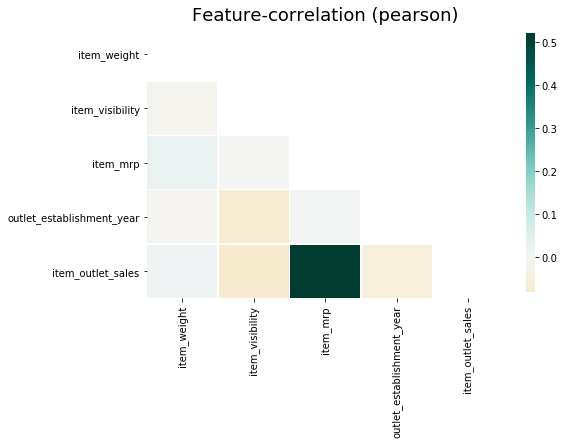

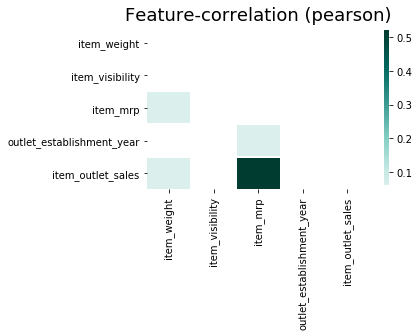

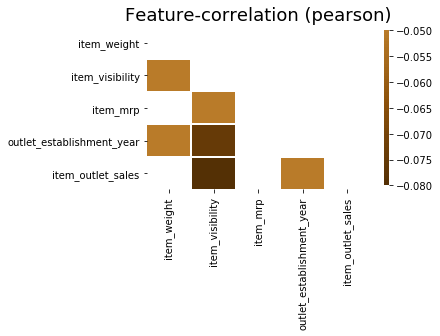

In [117]:
#The gif below shows the output of the following three function calls:

klib.corr_plot(df_cleaned, annot=False, figsize=(8,5))
klib.corr_plot(df_cleaned, split='pos', annot=False, figsize=(5,3))
klib.corr_plot(df_cleaned, split='neg', annot=False, figsize=(5,3))

In [119]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [120]:
#The gif below shows the output of the following three function calls:

klib.corr_plot(df_cleaned, target='Item_Outlet_Sales')
klib.corr_plot(df_cleaned, target='Item_Outlet_Sales', method="spearman")
klib.corr_plot(df_cleaned, target='Item_Outlet_Sales', method="kendall")

KeyError: 'Item_Outlet_Sales'

GridSpec(6, 7)

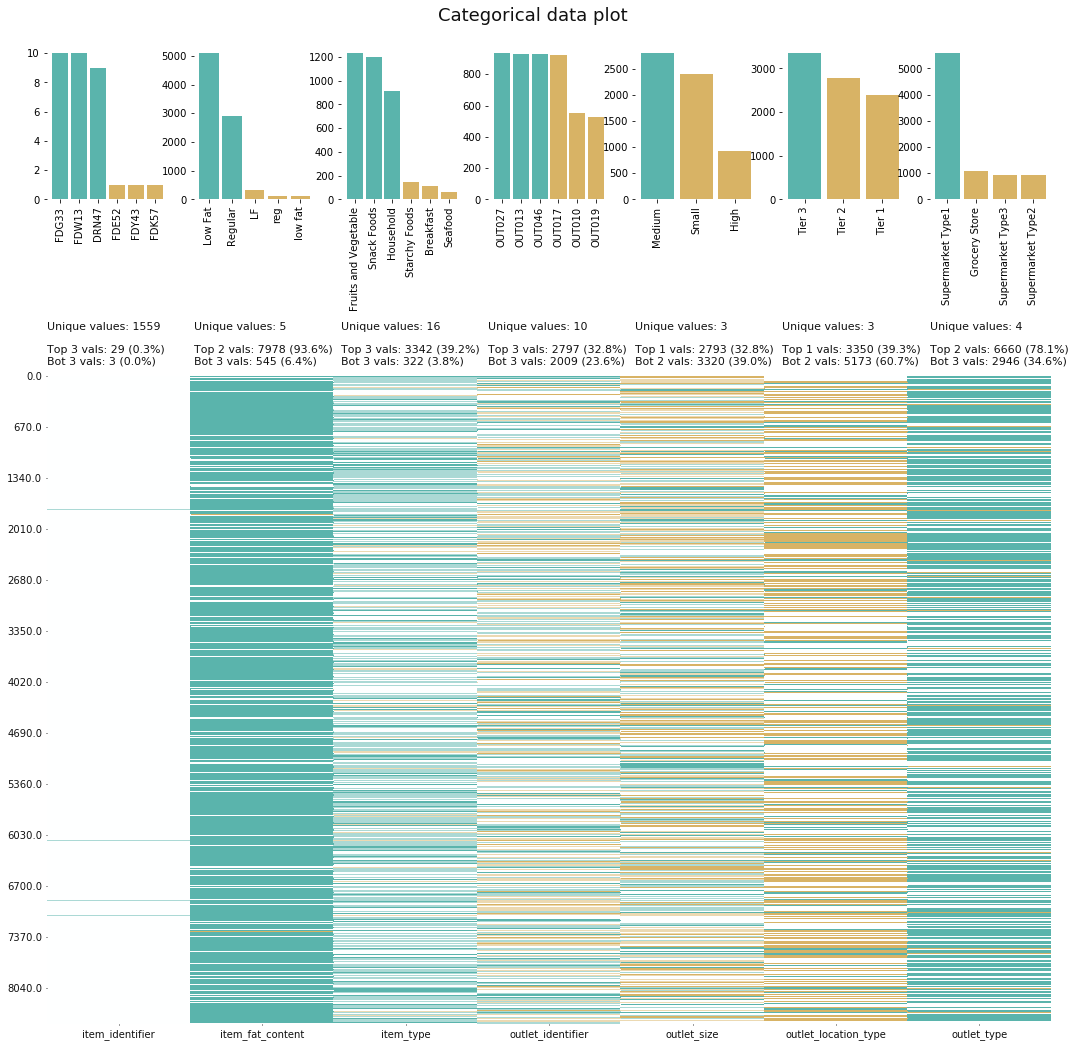

In [121]:
#categorical data
klib.cat_plot(df_cleaned)

### How to optimize my pandas data frame pre-processing?

In [ ]:
# import useful libraries
import pandas as pd
from langdetect import detect
import nltk
from html2text import unescape
from nltk.corpus import stopwords

# define corpus
words = set(nltk.corpus.words.words())

# define stopwords
stop = stopwords.words('english')
newStopWords = ['oz','stopWord2']
stop.extend(newStopWords)

# read csv into dataframe
df=pd.read_csv('./data.csv')

# unescape reviews (fix html encoding)
df['clean_reviews'] = df['reviews'].apply(unescape, unicode_snob=True)

# remove non-ASCII characters
df['clean_reviews'] = df["clean_reviews"].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

# calculate number of stop words in raw reviews
df['stopwords'] = df['reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))

# lowercase reviews
df['clean_reviews'] = df['clean_reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# add a space before and after every punctuation 
df['clean_reviews'] = df['clean_reviews'].str.replace(r'([^\w\s]+)', ' \\1 ')

# remove punctuation
df['clean_reviews'] = df['clean_reviews'].str.replace('[^\w\s]','')

# remove stopwords
df['clean_reviews'] = df['clean_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# remove digits
df['clean_reviews'] = df['clean_reviews'].str.replace('\d+', '')

# remove non-corpus words
def remove_noncorpus(sentence):
    print(sentence)
    return " ".join(w for w in nltk.wordpunct_tokenize(sentence) if w.lower() in words or not w.isalpha())

df['clean_reviews'] = df['clean_reviews'].map(remove_noncorpus)

# count number of characters
df['character_count'] = df['clean_reviews'].apply(len)

# count number of words
df['word_count'] = df['clean_reviews'].str.split().str.len()

# average word length
def avg_word(sentence):
  words = sentence.split()
  print(sentence)
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['clean_reviews'].apply(lambda x: avg_word(x))
df[['clean_reviews','avg_word']].head()

# detect language of reviews
df['language'] = df['clean_reviews'].apply(detect)

# filter out non-English reviews
msk = (df['language'] == 'en')
df_range = df[msk]

# write dataframe to csv
df_range.to_csv('dataclean.csv', index=False)

### The first function here is to give you a general idea of the total and percentage of missing data in each column:

In [124]:
def intitial_eda_checks(df):
    '''
    Takes df
    Checks nulls
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')

In [125]:
intitial_eda_checks(df)

Total and Percentage of NaN:
              Total   Percent
Outlet_Size   2410  0.282764
Item_Weight   1463  0.171653


In [123]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

#### With specification of the threshold of the missing value percentage, the following function will give you a list of columns that have missing values over that threshold:


In [127]:

def view_columns_w_many_nans(df, missing_percent):
    '''
    Checks which columns have over specified percentage of missing values
    Takes df, missing percentage
    Returns columns as a list
    '''
    mask_percent = df.isnull().mean()
    series = mask_percent[mask_percent > missing_percent]
    columns = series.index.to_list()
    print(columns) 
    return columns

In [130]:
view_columns_w_many_nans(df, 1)

[]


[]

### There are many ways to deal with missing values. If you decide to drop the columns with too many missing values (over a certain threshold you specify), you can use this function to accomplish the task:


In [131]:

def drop_columns_w_many_nans(df, missing_percent):
    '''
    Takes df, missing percentage(default=.9)
    Drops the columns whose missing value is bigger than missing percentage
    Returns df
    '''
    series = view_columns_w_many_nans(df, missing_percent=missing_percent)
    list_of_cols = series.index.to_list()
    df.drop(columns=list_of_cols)
    print(list_of_cols)
    return df

In [133]:
drop_columns_w_many_nans(df, 5)

[]


AttributeError: 'builtin_function_or_method' object has no attribute 'to_list'

### The following function will create a group of plots for all numerical columns in your dataset.

In [134]:
def histograms_numeric_columns(df, numerical_columns):
    '''
    Takes df, numerical columns as list
    Returns a group of histagrams
    '''
    f = pd.melt(df, value_vars=numerical_columns) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

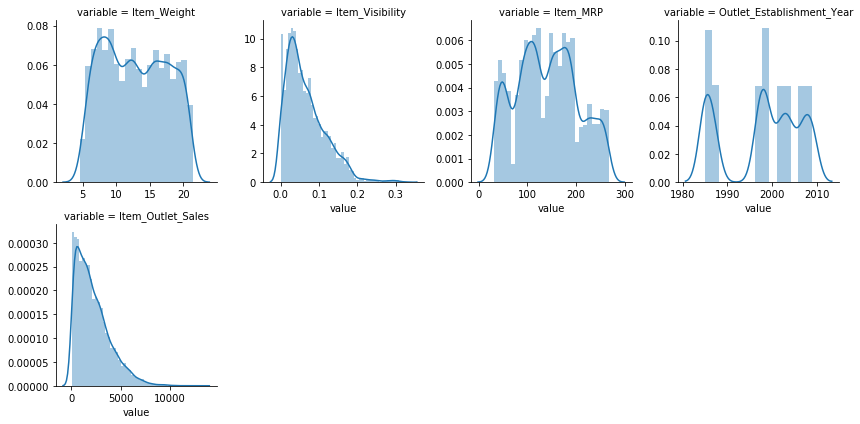

In [143]:
histograms_numeric_columns(df, numerical_columns)

In [138]:
# find all numeric and string columns from df (remove the first column which is `summary`)
cols = df.columns[1:]
cols

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [142]:
# get a mapping of column vs dtypes of the df:
dtype_mapping = dict(df.dtypes)
#{'d2': 'double',
# 'd5': 'double',
# 'dt': 'timestamp',
# 'f3': 'double',
# 'i1': 'bigint',
# 's4': 'string'}

# filter out string-type from cols using the above mapping:
numeric_cols = [ c for c in cols if dtype_mapping[c] != 'string' ]

TypeError: data type 'string' not understood

In [141]:
numerical_columns=df.loc[:,df.dtypes!=np.object]
numerical_columns

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1           5.920         0.019278   48.2692                       2009   
2          17.500         0.016760  141.6180                       1999   
3          19.200         0.000000  182.0950                       1998   
4           8.930         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
8518        6.865         0.056783  214.5218                       1987   
8519        8.380         0.046982  108.1570                       2002   
8520       10.600         0.035186   85.1224                       2004   
8521        7.210         0.145221  103.1332                       2009   
8522       14.800         0.044878   75.4670                       1997   

      Item_Outlet_Sales  
0             3735.1380  
1              443.4228  
2             2097.2700  
3              732.3800  
4              994.7052  
...                 ...  
8518          2778.3834  
8519           549.2850  
8520          1193.1136  
8521          1845.5976  
8522           765.6700  

[8523 rows x 5 columns]

In [140]:
categorical_columns=df.loc[:,df.dtypes==np.object]
categorical_columns


Item_Identifier Item_Fat_Content              Item_Type  \
0              FDA15          Low Fat                  Dairy   
1              DRC01          Regular            Soft Drinks   
2              FDN15          Low Fat                   Meat   
3              FDX07          Regular  Fruits and Vegetables   
4              NCD19          Low Fat              Household   
...              ...              ...                    ...   
8518           FDF22          Low Fat            Snack Foods   
8519           FDS36          Regular           Baking Goods   
8520           NCJ29          Low Fat     Health and Hygiene   
8521           FDN46          Regular            Snack Foods   
8522           DRG01          Low Fat            Soft Drinks   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
0               OUT049      Medium               Tier 1  Supermarket Type1  
1               OUT018      Medium               Tier 3  Supermarket Type2  
2               OUT049      Medium               Tier 1  Supermarket Type1  
3               OUT010         NaN               Tier 3      Grocery Store  
4               OUT013        High               Tier 3  Supermarket Type1  
...                ...         ...                  ...                ...  
8518            OUT013        High               Tier 3  Supermarket Type1  
8519            OUT045         NaN               Tier 2  Supermarket Type1  
8520            OUT035       Small               Tier 2  Supermarket Type1  
8521            OUT018      Medium               Tier 3  Supermarket Type2  
8522            OUT046       Small               Tier 1  Supermarket Type1  

[8523 rows x 7 columns]

### check the correlation between your dependent and independent variables

In [144]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    '''
    Takes df, a dependant variable as str
    Returns a heatmap of all independent variables' correlations with dependent variable 
    '''
    plt.figure(figsize=(8, 10))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return g

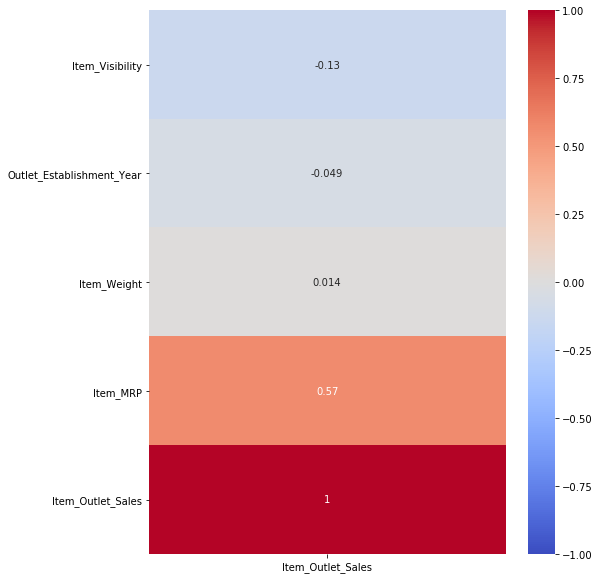

In [145]:
heatmap_numeric_w_dependent_variable(df, 'Item_Outlet_Sales')

### Automated Chart function for individual variables: 
We first create a function which would automate the chart generation for all variables individually. We call this function MultiPlots_Univariate. This function takes a data frame argument (called df_plot inside the function).

In [164]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()

import pandas as pd
import itertools

# Plotly
import plotly.graph_objects as go
import plotly.express as px

#fig = plot_plotly(m, forecast)  # This returns a plotly Figure
#py.iplot(fig)

In [167]:
def MultiPlots_Univariate(df_plot):

    for col in df_plot.columns:
        if (df_plot[col].dtype == 'int64') or (df_plot[col].dtype == 'float64'):
            #uses Plot.ly express
            fig = px.histogram(df_plot, x=col)
            fig.update_layout(title=go.layout.Title(text=col,x = 0, font=dict(size=10,color='red')))
            fig.show()
        elif df_plot[col].dtype == 'object':
            df_pie = df_plot.copy()
            #Pie plots need data to be arranged in terms of the pie sizes, hence use groupby to get sizes of each group
            df_pie.insert(0,'freq', 1) # Insert a column for the frequency of the group
            df_pie.insert(1,'%', 1) # Insert a column for the %size of the group
            df_pie = df_pie[[col, 'freq', '%']] # The data frame consists of just the required columns
            df_pie = df_pie.groupby(col).agg(sum) # Groupby each column by the groups, with values equal to sum of group
            df_pie['%'] = df_pie['freq'].apply(lambda x : 100* (x / len(df_pie)) )
            sizes = df_pie['%'].values
            values = df_pie['freq'].values
            labels = df_pie.index.values
            #uses Plot.ly go
            fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
            fig.update_layout(title=go.layout.Title(text=col,x = 0, font=dict(size=10,color='red')))
            fig.show()

    return(0)

In [168]:


MultiPlots_Univariate(df)

0

### Automated Chart function for sets of two variables: 
Next we are going to create a function to generate charts for sets of two variables for all variables in the dataset. This is where the fun part begins. The trick here is to use the itertools function to select all possible combinations of two variables in the dataset. When we have all the unique combinations, then depending of the data types of the two variables we can decide which plots to create. Another fun trick is to use the matrix plot functionality of pandas which has also been extended into plotly express.
<br>
https://www.datagraphi.com/blog/post/2019/8/25/lightning-fast-data-visualization-of-an-entire-data-set-in-python-in-2-seconds

In [165]:
def MultiPlots_Bivariate(df_plot):

    #Matrix Plot All variables
    fig = px.scatter_matrix(df_plot)
    fig.update_layout(
    width=1500,
    height=1500,)
    fig.update_layout(title=go.layout.Title(text = 'Matrix Plot All Variables', x = 0, font=dict(size=18,color='red')))
    fig.show()

    # We use itertools to create combinations of 2 elements from all variables
    for combination in itertools.combinations(df_plot.columns, 2):
        x= combination[0]
        y = combination[1]

        if ((df_plot[x].dtype == 'int64') or (df_plot[x].dtype == 'float64')) and ((df_plot[y].dtype == 'int64') or (df_plot[y].dtype == 'float64')):
            pass
        elif (str(df_plot[x].dtype) == 'category') and ((df_plot[y].dtype == 'int64') or (df_plot[y].dtype == 'float64')):
            fig = px.box(df_plot, x=x, y=y)
            fig.update_layout(title=go.layout.Title(text = 'Boxplot {} vs {}'.format(y, x), x = 0, font=dict(size=18,color='red')))
            fig.show()
        elif (str(df_plot[y].dtype) == 'category') and ((df_plot[x].dtype == 'int64') or (df_plot[x].dtype == 'float64')):
            fig = px.box(df_plot, x=y, y=x)
            fig.update_layout(title=go.layout.Title(text = 'Boxplot {} vs {}'.format(x, y), x = 0, font=dict(size=18,color='red')))
            fig.show()
        elif (str(df_plot[x].dtype) == 'category') and (str(df_plot[y].dtype) == 'category'):
            #create stacked bar chart
            xtab = pd.crosstab(df_plot[x], df_plot[y], dropna=False) # pandas cross tab feature comes very handy
            x_row = list(xtab.columns[:]) # the x axis would be the same for all stackings
            fig = go.Figure()
            for i in range(0, len(xtab.index)): #we loop through all the rows
                fig.add_trace(go.Bar(x=x_row, y=xtab.iloc[i], name = xtab.index[i])) #with iloc select the entire row as stack
                fig.update_layout(barmode='relative', title = go.layout.Title(text='Stacked plot {} vs {}'.format(x, y), x = 0, font=dict(size=18,color='red')))
                fig.update_layout(xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text=x)),yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(
            text=y)))
            fig.show()

In [166]:
MultiPlots_Bivariate(df)

https://ugoproto.github.io/ugo_py_doc/feature_selection_in_python/

In [ ]:
'''
### read in the .docx file extention
'''
import docx
doc = docx.Document('..\\Sample_File_DOCX.docx')
paras = [p.text for p in doc.paragraphs if p.text]  